# SET UP

## CREAR EL ENTORNO PARA EL PROYECTO

Crear un nuevo entorno e instalar los paquetes básicos:

1. Ir al prompt o terminal
2. Copiar y poner la línea inferior:

conda create --name retail python numpy pandas matplotlib seaborn scikit-learn scipy sqlalchemy xgboost jupyter

3. Activar el nuevo entorno:

conda activate retail

4. Instalar los paquetes que están en otros canales:

conda install -c conda-forge pyjanitor scikit-plot yellowbrick imbalanced-learn jupyter_contrib_nbextensions cloudpickle

conda install -c districtdatalabs yellowbrick

pip install category_encoders

5. Crear el environment.yml

conda env export > retail.yml

*Nota: es posible que te lo haya creado en C:\Users\tu_usuario, más adelante moveremos este archivo al directorio del proyecto*

## IMPORTAR PAQUETES

In [1]:
import os
import numpy as np
import pandas as pd

#Automcompletar rápido
%config IPCompleter.greedy=True

## CREAR EL DIRECTORIO DEL PROYECTO

### Definir el directorio raiz donde vamos a crear el proyecto

In [2]:
raiz = 'C:/Users/isaac/Google Drive/DS4B/CursoMachineLearningPython/03_MACHINE_LEARNING/08_CASOS/'

### Definir el nombre del proyecto

In [3]:
nombre_dir = '02_RETAIL'

### Crear el directorio y la estructura del proyecto

In [4]:
path = raiz + nombre_dir

In [4]:
# try:
#     os.mkdir(path)
#     os.mkdir(path + '/01_Documentos')
#     os.mkdir(path + '/02_Datos')
#     os.mkdir(path + '/02_Datos/01_Originales')
#     os.mkdir(path + '/02_Datos/02_Validacion')
#     os.mkdir(path + '/02_Datos/03_Trabajo')
#     os.mkdir(path + '/02_Datos/04_Caches')
#     os.mkdir(path + '/03_Notebooks')
#     os.mkdir(path + '/03_Notebooks/01_Funciones')
#     os.mkdir(path + '/03_Notebooks/02_Desarrollo')
#     os.mkdir(path + '/03_Notebooks/03_Sistema')
#     os.mkdir(path + '/04_Modelos')
#     os.mkdir(path + '/05_Resultados')
#     os.mkdir(path + '/09_Otros')
    
# except OSError:
#     print ("La creación del directorio %s ha fallado" % path)
# else:
#     print ("Se ha creado satisfactoriamente el directorio %s " % path)

Se ha creado satisfactoriamente el directorio C:/Users/isaac/Google Drive/DS4B/CursoMachineLearningPython/03_MACHINE_LEARNING/08_CASOS/02_RETAIL 


### Situar el directorio de trabajo en el proyecto

In [5]:
os.chdir(path)

### Mover el environment.yml

Buscar manualmente el archivo retail.yml, que posiblemente lo haya ubicado en C:\Users\tu_usuario y moverlo a la carpeta /01_Documentos'

## CREAR LOS DATASETS INICIALES

Poner los datos originales en la carpeta '/02_Datos/01_Originales'

### Importar los datos

Sustituir el nombre_fichero_datos.

In [6]:
nombre_fichero_datos = 'hipermercado.db'
ruta_completa = path + '/02_Datos/01_Originales/' + nombre_fichero_datos

Cargar los datos.

In [7]:
import sqlalchemy as sa

In [8]:
con = sa.create_engine('sqlite:///' + ruta_completa)

In [9]:
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['calendar', 'sales', 'sell_prices']

In [10]:
cal = pd.read_sql('calendar', con)
cal.drop(columns='index',inplace=True)
cal.head()

date  wm_yr_wk    weekday  wday  month  year      d event_name_1  \
0  2013-01-01     11249    Tuesday     4      1  2013  d_704      NewYear   
1  2013-01-02     11249  Wednesday     5      1  2013  d_705         None   
2  2013-01-03     11249   Thursday     6      1  2013  d_706         None   
3  2013-01-04     11249     Friday     7      1  2013  d_707         None   
4  2013-01-05     11250   Saturday     1      1  2013  d_708         None   

  event_type_1 event_name_2 event_type_2  
0     National         None         None  
1         None         None         None  
2         None         None         None  
3         None         None         None  
4         None         None         None

In [38]:
sales = pd.read_sql('sales', con)
sales.drop(columns='index',inplace=True)
sales.head()

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3       CA   
1  FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3       CA   
2  FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3       CA   
3  FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3       CA   
4  FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3       CA   

   d_704  d_705  d_706  d_707  ...  d_1789  d_1790  d_1791  d_1792  d_1793  \
0      0    224    241    232  ...       5       2       0       0       6   
1      0      0      0      0  ...      54      63      44       0      65   
2     20     23     23     25  ...      43      40      39       0      29   
3     34     27     40     49  ...      31      43      32       0      52   
4      0      0      0      0  ...      29      45      28       0      46   

   d_1794  d_1795  d_1796  d_1797  d_1798  
0       0       6       0       0       0  
1      90     104      73      76      97  
2      33      27      13      26      47  
3      37      32      29      34      27  
4      36      40      31      46      36  

[5 rows x 1101 columns]

In [39]:
prices = pd.read_sql('sell_prices', con)
prices.drop(columns='index',inplace=True)
prices.head()

store_id      item_id  wm_yr_wk  sell_price
0     CA_3  FOODS_3_090     11249        1.25
1     CA_3  FOODS_3_090     11250        1.25
2     CA_3  FOODS_3_090     11251        1.25
3     CA_3  FOODS_3_090     11252        1.25
4     CA_3  FOODS_3_090     11301        1.38

## CREAR EL TABLON ANALITICO

### Entender la relación entre las tablas

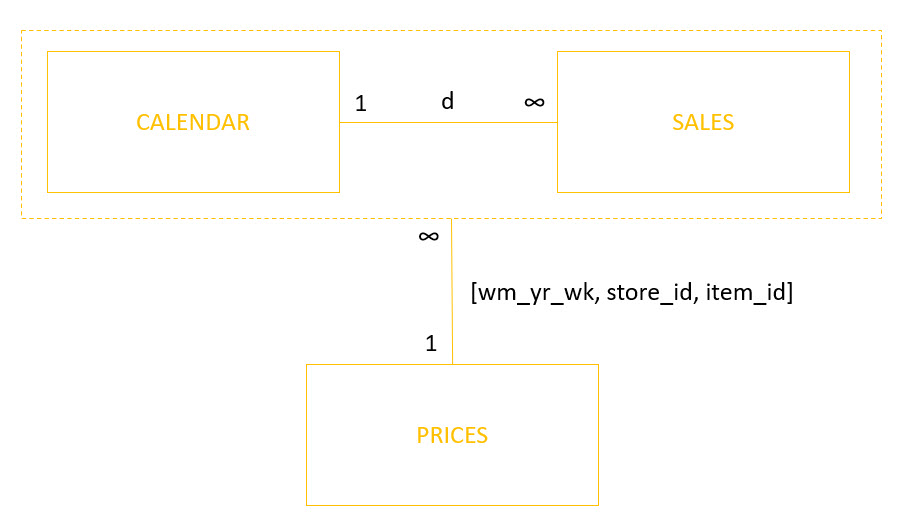

In [40]:
from IPython import display
display.Image("../../99_Media/CasoRetail_EstructuraRelaciones.jpg")

NOTAS:

* Primero unir cal con sales, ya que para unir prices necesitamos campos de ambas
* Para unir cal con sales primero hay que modificar sales, para pasar la variable d a filas

### Unión de cal con sales

#### Transformar la estructura de sales

In [41]:
sales.head()

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3       CA   
1  FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3       CA   
2  FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3       CA   
3  FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3       CA   
4  FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3       CA   

   d_704  d_705  d_706  d_707  ...  d_1789  d_1790  d_1791  d_1792  d_1793  \
0      0    224    241    232  ...       5       2       0       0       6   
1      0      0      0      0  ...      54      63      44       0      65   
2     20     23     23     25  ...      43      40      39       0      29   
3     34     27     40     49  ...      31      43      32       0      52   
4      0      0      0      0  ...      29      45      28       0      46   

   d_1794  d_1795  d_1796  d_1797  d_1798  
0       0       6       0       0       0  
1      90     104      73      76      97  
2      33      27      13      26      47  
3      37      32      29      34      27  
4      36      40      31      46      36  

[5 rows x 1101 columns]

In [42]:
sales = sales.melt(id_vars = sales.columns[0:6],
                   var_name = 'd',
                   value_name = 'ventas')
sales

id      item_id  dept_id cat_id store_id  \
0      FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3   
1      FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3   
2      FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3   
3      FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3   
4      FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3   
...                            ...          ...      ...    ...      ...   
21895  FOODS_3_329_CA_4_validation  FOODS_3_329  FOODS_3  FOODS     CA_4   
21896  FOODS_3_555_CA_4_validation  FOODS_3_555  FOODS_3  FOODS     CA_4   
21897  FOODS_3_586_CA_4_validation  FOODS_3_586  FOODS_3  FOODS     CA_4   
21898  FOODS_3_587_CA_4_validation  FOODS_3_587  FOODS_3  FOODS     CA_4   
21899  FOODS_3_714_CA_4_validation  FOODS_3_714  FOODS_3  FOODS     CA_4   

      state_id       d  ventas  
0           CA   d_704       0  
1           CA   d_704       0  
2           CA   d_704      20  
3           CA   d_704      34  
4           CA   d_704       0  
...        ...     ...     ...  
21895       CA  d_1798       6  
21896       CA  d_1798       5  
21897       CA  d_1798      11  
21898       CA  d_1798      16  
21899       CA  d_1798      21  

[21900 rows x 8 columns]

Eliminamos la variable id que ya no aporta nada.

In [43]:
sales.drop(columns='id',inplace=True)

#### Cruzar con calendar para incorporar su información

In [44]:
df = sales.merge(right = cal, how = 'left', on = 'd')
df.head()

item_id  dept_id cat_id store_id state_id      d  ventas        date  \
0  FOODS_3_090  FOODS_3  FOODS     CA_3       CA  d_704       0  2013-01-01   
1  FOODS_3_120  FOODS_3  FOODS     CA_3       CA  d_704       0  2013-01-01   
2  FOODS_3_202  FOODS_3  FOODS     CA_3       CA  d_704      20  2013-01-01   
3  FOODS_3_252  FOODS_3  FOODS     CA_3       CA  d_704      34  2013-01-01   
4  FOODS_3_288  FOODS_3  FOODS     CA_3       CA  d_704       0  2013-01-01   

   wm_yr_wk  weekday  wday  month  year event_name_1 event_type_1  \
0     11249  Tuesday     4      1  2013      NewYear     National   
1     11249  Tuesday     4      1  2013      NewYear     National   
2     11249  Tuesday     4      1  2013      NewYear     National   
3     11249  Tuesday     4      1  2013      NewYear     National   
4     11249  Tuesday     4      1  2013      NewYear     National   

  event_name_2 event_type_2  
0         None         None  
1         None         None  
2         None         None  
3         None         None  
4         None         None

### Incorporacion de prices

In [45]:
prices.head()

store_id      item_id  wm_yr_wk  sell_price
0     CA_3  FOODS_3_090     11249        1.25
1     CA_3  FOODS_3_090     11250        1.25
2     CA_3  FOODS_3_090     11251        1.25
3     CA_3  FOODS_3_090     11252        1.25
4     CA_3  FOODS_3_090     11301        1.38

In [46]:
df = df.merge(right = prices, how = 'left', on = ['store_id','item_id','wm_yr_wk'])
df

item_id  dept_id cat_id store_id state_id       d  ventas  \
0      FOODS_3_090  FOODS_3  FOODS     CA_3       CA   d_704       0   
1      FOODS_3_120  FOODS_3  FOODS     CA_3       CA   d_704       0   
2      FOODS_3_202  FOODS_3  FOODS     CA_3       CA   d_704      20   
3      FOODS_3_252  FOODS_3  FOODS     CA_3       CA   d_704      34   
4      FOODS_3_288  FOODS_3  FOODS     CA_3       CA   d_704       0   
...            ...      ...    ...      ...      ...     ...     ...   
21895  FOODS_3_329  FOODS_3  FOODS     CA_4       CA  d_1798       6   
21896  FOODS_3_555  FOODS_3  FOODS     CA_4       CA  d_1798       5   
21897  FOODS_3_586  FOODS_3  FOODS     CA_4       CA  d_1798      11   
21898  FOODS_3_587  FOODS_3  FOODS     CA_4       CA  d_1798      16   
21899  FOODS_3_714  FOODS_3  FOODS     CA_4       CA  d_1798      21   

             date  wm_yr_wk   weekday  wday  month  year event_name_1  \
0      2013-01-01     11249   Tuesday     4      1  2013      NewYear   
1      2013-01-01     11249   Tuesday     4      1  2013      NewYear   
2      2013-01-01     11249   Tuesday     4      1  2013      NewYear   
3      2013-01-01     11249   Tuesday     4      1  2013      NewYear   
4      2013-01-01     11249   Tuesday     4      1  2013      NewYear   
...           ...       ...       ...   ...    ...   ...          ...   
21895  2015-12-31     11548  Thursday     6     12  2015         None   
21896  2015-12-31     11548  Thursday     6     12  2015         None   
21897  2015-12-31     11548  Thursday     6     12  2015         None   
21898  2015-12-31     11548  Thursday     6     12  2015         None   
21899  2015-12-31     11548  Thursday     6     12  2015         None   

      event_type_1 event_name_2 event_type_2  sell_price  
0         National         None         None        1.25  
1         National         None         None        4.98  
2         National         None         None        4.28  
3         National         None         None        1.48  
4         National         None         None         NaN  
...            ...          ...          ...         ...  
21895         None         None         None        2.98  
21896         None         None         None        1.68  
21897         None         None         None        1.68  
21898         None         None         None        2.48  
21899         None         None         None        1.58  

[21900 rows x 18 columns]

Comprobamos.

In [47]:
df[['store_id','item_id','wm_yr_wk','d','sell_price']]\
    .sort_values(by = ['store_id','item_id','wm_yr_wk','d'])\
    .head(10)

store_id      item_id  wm_yr_wk      d  sell_price
0       CA_3  FOODS_3_090     11249  d_704        1.25
20      CA_3  FOODS_3_090     11249  d_705        1.25
40      CA_3  FOODS_3_090     11249  d_706        1.25
60      CA_3  FOODS_3_090     11249  d_707        1.25
80      CA_3  FOODS_3_090     11250  d_708        1.25
100     CA_3  FOODS_3_090     11250  d_709        1.25
120     CA_3  FOODS_3_090     11250  d_710        1.25
140     CA_3  FOODS_3_090     11250  d_711        1.25
160     CA_3  FOODS_3_090     11250  d_712        1.25
180     CA_3  FOODS_3_090     11250  d_713        1.25

### Reordenar y poner date como index

In [48]:
df.head(1)

item_id  dept_id cat_id store_id state_id      d  ventas        date  \
0  FOODS_3_090  FOODS_3  FOODS     CA_3       CA  d_704       0  2013-01-01   

   wm_yr_wk  weekday  wday  month  year event_name_1 event_type_1  \
0     11249  Tuesday     4      1  2013      NewYear     National   

  event_name_2 event_type_2  sell_price  
0         None         None        1.25

In [49]:
orden = ['date',
         'state_id',
         'store_id',
         'dept_id',
         'cat_id',
         'item_id',
         'wm_yr_wk',
         'd',
         'ventas',
         'sell_price',
         'year',
         'month',
         'wday',
         'weekday',
         'event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2']

In [50]:
df = df[orden].set_index('date')
df

state_id store_id  dept_id cat_id      item_id  wm_yr_wk       d  \
date                                                                          
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_090     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_120     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_202     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_252     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_288     11249   d_704   
...             ...      ...      ...    ...          ...       ...     ...   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_329     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_555     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_586     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_587     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_714     11548  d_1798   

            ventas  sell_price  year  month  wday   weekday event_name_1  \
date                                                                       
2013-01-01       0        1.25  2013      1     4   Tuesday      NewYear   
2013-01-01       0        4.98  2013      1     4   Tuesday      NewYear   
2013-01-01      20        4.28  2013      1     4   Tuesday      NewYear   
2013-01-01      34        1.48  2013      1     4   Tuesday      NewYear   
2013-01-01       0         NaN  2013      1     4   Tuesday      NewYear   
...            ...         ...   ...    ...   ...       ...          ...   
2015-12-31       6        2.98  2015     12     6  Thursday         None   
2015-12-31       5        1.68  2015     12     6  Thursday         None   
2015-12-31      11        1.68  2015     12     6  Thursday         None   
2015-12-31      16        2.48  2015     12     6  Thursday         None   
2015-12-31      21        1.58  2015     12     6  Thursday         None   

           event_type_1 event_name_2 event_type_2  
date                                               
2013-01-01     National         None         None  
2013-01-01     National         None         None  
2013-01-01     National         None         None  
2013-01-01     National         None         None  
2013-01-01     National         None         None  
...                 ...          ...          ...  
2015-12-31         None         None         None  
2015-12-31         None         None         None  
2015-12-31         None         None         None  
2015-12-31         None         None         None  
2015-12-31         None         None         None  

[21900 rows x 17 columns]

### Extraer y reservar el dataset de validación

Dado que es un problema de forecasting no podemos extraer el dataset de validación de forma aleatoria.

Si no que éste estará compuesto por los últimos datos disponibles.

In [55]:
val = df['2015-12-01':'2015-12-31']

trabajo = df[:'2015-11-31']

In [56]:
nombre_fichero_validacion = 'validacion.csv'

ruta_completa = path + '/02_Datos/02_Validacion/' + nombre_fichero_validacion

val.to_csv(ruta_completa)

### Extraer y guardar el dataset de trabajo

In [58]:
nombre_fichero_trabajo = 'trabajo.csv'

ruta_completa = path + '/02_Datos/03_Trabajo/' + nombre_fichero_trabajo

trabajo.to_csv(ruta_completa)

### Extraer y guardar una muestra (opcional)

En este proyecto no haremos muestra.